In [1]:
import pandas as pd

# Inegi

In [2]:
inegi = pd.read_csv('inegi.csv')
inegi.drop(columns=['nom_estab', 'per_ocu', 'fecha_alta', 'nom_processed', 'tipoUniEco'], inplace=True)
inegi.columns

Index(['entidad', 'municipio', 'localidad', 'latitud', 'longitud', 'tipo',
       'Cocina Económica', 'Antojitos', 'Pizza', 'Hamburguesas', 'Hot Dogs',
       'Sushi', 'Tamales', 'Mariscos', 'Pescado', 'Tacos', 'Carne', 'Asada',
       'Panuchos', 'Cochinita', 'Pollo', 'Desayunos', 'Tortas', 'Mondongo',
       'Menudo', 'Memelas', 'Empanadas', 'Chicharrón', 'Gorditas', 'Costillas',
       'Carnitas', 'Doraditas', 'Baguettes', 'Parrilla', 'Huaraches',
       'Rosticería', 'China', 'Yucateca', 'Tabasqueña', 'Arrachera', 'Pastor',
       'Birria', 'Barbacoa', 'Carnero', 'Pozole', 'Enchiladas', 'Chilaquiles'],
      dtype='object')

In [3]:
inegi['entidad'] = inegi['entidad'].apply(lambda x: 'YUCATAN' if 'YUCA' in x else x)
yinegi = inegi[inegi['entidad']=='YUCATAN']
yinegi.head()

,entidad,municipio,localidad,latitud,longitud,tipo,Cocina Económica,Antojitos,Pizza,Hamburguesas,...,Yucateca,Tabasqueña,Arrachera,Pastor,Birria,Barbacoa,Carnero,Pozole,Enchiladas,Chilaquiles
152158,YUCATAN,Mérida,Mérida,21.001433,-89.605708,['arracher'],0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152159,YUCATAN,Mérida,Mérida,21.038795,-89.601918,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152160,YUCATAN,Mérida,Mérida,21.024276,-89.624382,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152161,YUCATAN,Mérida,Mérida,21.020646,-89.585322,['restaur'],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152162,YUCATAN,Mérida,Mérida,20.998787,-89.566374,['pizz'],0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
yinegi['localidad'].value_counts()

Mérida                      7475
Valladolid                   636
Kanasín                      600
Tizimín                      529
Ticul                        483
                            ... 
Hubikú                         1
Misión [Hotel]                 1
San Antonio Chablé             1
San Francisco Manzanilla       1
San Felipe Nuevo               1
Name: localidad, Length: 157, dtype: int64

In [5]:
yinegi.drop(yinegi[yinegi['localidad']!='Mérida'].index, inplace=True)
yinegi['localidad'].value_counts()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mérida    7475
Name: localidad, dtype: int64

In [6]:
foods = ['Cocina Económica', 'Antojitos', 'Pizza', 'Hamburguesas', 'Hot Dogs', 'Sushi', 'Tamales', 'Mariscos', 
         'Pescado', 'Tacos', 'Carne', 'Asada', 'Panuchos', 'Cochinita', 'Pollo', 'Desayunos', 'Tortas', 'Mondongo', 
         'Menudo', 'Memelas', 'Empanadas', 'Chicharrón', 'Gorditas', 'Costillas', 'Carnitas', 'Doraditas', 
         'Baguettes', 'Parrilla', 'Huaraches', 'Rosticería', 'China', 'Yucateca', 'Tabasqueña', 'Arrachera', 
         'Pastor', 'Birria', 'Barbacoa', 'Carnero', 'Pozole', 'Enchiladas', 'Chilaquiles']

In [7]:
inegi_results = {}

for food in foods:
    inegi_results[food] = yinegi[food].sum()
    
inegi_results

{'Cocina Económica': 1409,
 'Antojitos': 1030,
 'Pizza': 309,
 'Hamburguesas': 149,
 'Hot Dogs': 36,
 'Sushi': 42,
 'Tamales': 91,
 'Mariscos': 59,
 'Pescado': 91,
 'Tacos': 670,
 'Carne': 1,
 'Asada': 177,
 'Panuchos': 198,
 'Cochinita': 118,
 'Pollo': 230,
 'Desayunos': 89,
 'Tortas': 203,
 'Mondongo': 13,
 'Menudo': 0,
 'Memelas': 0,
 'Empanadas': 27,
 'Chicharrón': 74,
 'Gorditas': 10,
 'Costillas': 15,
 'Carnitas': 40,
 'Doraditas': 23,
 'Baguettes': 6,
 'Parrilla': 43,
 'Huaraches': 7,
 'Rosticería': 20,
 'China': 0,
 'Yucateca': 48,
 'Tabasqueña': 13,
 'Arrachera': 4,
 'Pastor': 22,
 'Birria': 0,
 'Barbacoa': 15,
 'Carnero': 1,
 'Pozole': 12,
 'Enchiladas': 1,
 'Chilaquiles': 0}

In [8]:
pd.set_option('display.max_rows', 20)

In [9]:
df = pd.DataFrame(inegi_results.items(), columns = ['Index', 'InegiCount']).set_index('Index')
df.head()

,InegiCount
Index,
Cocina Económica,1409
Antojitos,1030
Pizza,309
Hamburguesas,149
Hot Dogs,36


# User Location - GeoPy API

In [63]:
from geopy.geocoders import Nominatim

user_input = input('Introduce lugar:')

geolocator = Nominatim(user_agent="food-business-recommender")
location = geolocator.geocode(user_input)
#print(location.address)
print((location.latitude, location.longitude))
#print(location.raw)

Introduce lugar:pensiones merida yucatan
(20.99759415, -89.64709420877386)


# Google Trends

### Revisaremos qué tantas búsquedas se hacen en Google sobre cada uno de los giros de comida, con el fin de conocer dónde está el interés del consumidor.
### Para esto utilizaremos la API de Google Trends a través de pytrends.

In [10]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='es-MX', tz=360)

In [11]:
resultados = []
for comida in inegi_results:
    print(comida)
    pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
    resultados.append(pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False))
    
resultados

Cocina Económica
Antojitos
Pizza
Hamburguesas
Hot Dogs
Sushi
Tamales
Mariscos
Pescado
Tacos
Carne
Asada
Panuchos
Cochinita
Pollo
Desayunos
Tortas
Mondongo
Menudo
Memelas
Empanadas
Chicharrón
Gorditas
Costillas
Carnitas
Doraditas
Baguettes
Parrilla
Huaraches
Rosticería
China
Yucateca
Tabasqueña
Arrachera
Pastor
Birria
Barbacoa
Carnero
Pozole
Enchiladas
Chilaquiles


[                     Cocina Económica
 geoName                              
 Aguascalientes                      0
 Baja California                     0
 Baja California Sur                 0
 Campeche                            0
 Chiapas                             0
 ...                               ...
 Tamaulipas                          0
 Tlaxcala                            0
 Veracruz                            0
 Yucatán                           100
 Zacatecas                           0
 
 [32 rows x 1 columns],                      Antojitos
 geoName                       
 Aguascalientes              12
 Baja California             20
 Baja California Sur         19
 Campeche                   100
 Chiapas                     30
 ...                        ...
 Tamaulipas                  25
 Tlaxcala                    18
 Veracruz                    58
 Yucatán                     33
 Zacatecas                   30
 
 [32 rows x 1 columns],                      Pizza

### Como los resultados nos los da por estados, filtramos y nos quedamos con las búsquedas en Yucatán.

In [12]:
busquedas = resultados[0].join(resultados[1:]).T
busquedas

geoName,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
Cocina Económica,0,0,0,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,100,0
Antojitos,12,20,19,100,30,28,18,11,36,30,...,47,39,22,19,40,25,18,58,33,30
Pizza,71,83,74,77,79,64,84,70,80,64,...,99,82,73,74,76,62,39,64,100,45
Hamburguesas,71,76,43,54,44,82,75,77,100,58,...,50,60,89,83,53,62,39,60,53,76
Hot Dogs,35,90,73,0,20,44,43,39,59,37,...,42,25,100,99,31,43,0,33,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbacoa,31,38,34,51,61,58,39,37,100,39,...,45,43,51,59,94,35,34,60,31,28
Carnero,33,8,0,21,20,11,60,17,0,21,...,33,20,9,12,5,17,33,18,100,0
Pozole,28,24,23,26,18,18,25,20,100,19,...,26,42,20,21,25,23,23,24,25,27
Enchiladas,80,49,66,40,35,61,54,72,89,85,...,58,94,77,51,60,59,36,53,42,100


In [13]:
trends = busquedas['Yucatán'].sort_values(ascending=False)
trends

Cocina Económica    100
Parrilla            100
Pizza               100
Carnero             100
Panuchos            100
                   ... 
Gorditas             18
Birria               16
Menudo               13
Tabasqueña           12
Rosticería            0
Name: Yucatán, Length: 41, dtype: int64

In [14]:
df['GoogleTrend'] = trends
df

,InegiCount,GoogleTrend
Index,,
Cocina Económica,1409,100
Antojitos,1030,33
Pizza,309,100
Hamburguesas,149,53
Hot Dogs,36,28
...,...,...
Barbacoa,15,31
Carnero,1,100
Pozole,12,25


## Interest over time

In [15]:
iot = {}
for comida in inegi_results:
    print(comida)
    pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
    iot[comida] = pytrends.interest_over_time()
    
iot

Cocina Económica
Antojitos
Pizza
Hamburguesas
Hot Dogs
Sushi
Tamales
Mariscos
Pescado
Tacos
Carne
Asada
Panuchos
Cochinita
Pollo
Desayunos
Tortas
Mondongo
Menudo
Memelas
Empanadas
Chicharrón
Gorditas
Costillas
Carnitas
Doraditas
Baguettes
Parrilla
Huaraches
Rosticería
China
Yucateca
Tabasqueña
Arrachera
Pastor
Birria
Barbacoa
Carnero
Pozole
Enchiladas
Chilaquiles


{'Cocina Económica':             Cocina Económica isPartial
 date                                  
 2015-03-08                 0     False
 2015-03-15                 0     False
 2015-03-22                42     False
 2015-03-29                46     False
 2015-04-05                 0     False
 ...                      ...       ...
 2020-02-02                28     False
 2020-02-09                54     False
 2020-02-16                26     False
 2020-02-23                26     False
 2020-03-01                 0      True
 
 [261 rows x 2 columns], 'Antojitos':             Antojitos isPartial
 date                           
 2015-03-08         24     False
 2015-03-15         20     False
 2015-03-22         22     False
 2015-03-29         13     False
 2015-04-05         22     False
 ...               ...       ...
 2020-02-02         43     False
 2020-02-09         34     False
 2020-02-16         34     False
 2020-02-23         36     False
 2020-03-01         61   

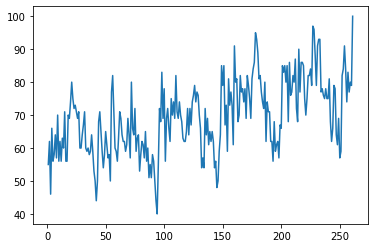

In [16]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(iot['Desayunos']['Desayunos']))]

#for food in foods:
plt.plot(x, iot['Desayunos']['Desayunos'].values);

In [17]:
iot['Gorditas']

,Gorditas,isPartial
date,,
2015-03-08,61,False
2015-03-15,50,False
2015-03-22,43,False
2015-03-29,42,False
2015-04-05,46,False
...,...,...
2020-02-02,77,False
2020-02-09,69,False
2020-02-16,73,False


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

slope = {}
for food in foods:
    linreg.fit(np.array(x).reshape(-1,1), iot[food][food].values)
    slope[food] = linreg.intercept_

slope

{'Cocina Económica': 5.914382552313588,
 'Antojitos': 20.597907456528144,
 'Pizza': 37.696463306808134,
 'Hamburguesas': 10.257058650162097,
 'Hot Dogs': 43.80462717359269,
 'Sushi': 44.261626878868256,
 'Tamales': 13.530150309460652,
 'Mariscos': 21.444827586206898,
 'Pescado': 29.52402004126142,
 'Tacos': 38.14291187739464,
 'Carne': 40.734217506631296,
 'Asada': 11.27444739168877,
 'Panuchos': 31.06044798113763,
 'Cochinita': 44.97147067491895,
 'Pollo': 56.13009136457413,
 'Desayunos': 58.58352490421455,
 'Tortas': 50.62861774241084,
 'Mondongo': 13.745564397288536,
 'Menudo': 15.036693191865606,
 'Memelas': 22.83575007368111,
 'Empanadas': 19.913351016799293,
 'Chicharrón': 4.320778072502211,
 'Gorditas': 49.99183613321544,
 'Costillas': 15.812054229295608,
 'Carnitas': 31.09053934571177,
 'Doraditas': 27.270999115826704,
 'Baguettes': 46.14945475979958,
 'Parrilla': 31.185470085470087,
 'Huaraches': 36.84134983790156,
 'Rosticería': 6.518302387267905,
 'China': 21.894252873563218

In [27]:
df['slope'] = ''
for key in slope:
    df['slope'].loc[key] = slope[key]
df.slope = df.slope.astype('float64')
df.dtypes

InegiCount       int64
GoogleTrend      int64
slope          float64
dtype: object

### Con esto, tenemos parametrizado el interés en el estado por cada uno de los giros de comida.
### Ahora, necesitamos revisar el grado de satisfacción de los usuarios por la oferta existente.

# Yelp

### Utilizando la API de Yelp, hacemos búsquedas nuevamente sobre los diferentes giros de comida para encontrar negocios y sus calificaciónes en la plataforma.

In [28]:
import requests
from bs4 import BeautifulSoup as bs
import json

In [29]:
client_id = 'JPrLnyol5AaT0XLf7CYbWg'
api_key = '5F0kTJmEIUsrAXKEcpqHA_HvL2uKWA3HZC_iQ73dGgIXgke7fCh84CBP5KpwVMXumfm4BahGo3iaBiNtBi9Q9vexfphH6urta05XSFaaQCs6aphzSQfWwhWSo_6nXHYx'
app_name = 'ravenous'

endpoint = 'https://api.yelp.com/v3/businesses/search?'
req_parameters_1 = ['location']
req_parameters_2 = ['latitud', 'longitude']
optional_parameters = ['term', 'radius', 'categories', 'locale', 'limit', 'sort_by', 'price']

In [62]:
location

'latitude=20.99759415&longitude=-89.64709420877386&'

In [64]:
yelp_search = []
for comida in foods:
    term = 'term={}&'.format(comida)
    print(term)
    latitude = 'latitude='+str(location.latitude)+'&'
    longitude = 'longitude='+str(location.longitude)+'&'
    locale = 'locale=es_MX&'
    radius = 'radius=3000&'
    limit = 'limit=50' 
    res = requests.get(endpoint+term+latitude+longitude+locale+radius+limit, headers={'Authorization':'Bearer '+api_key})
    soup = bs(res.content)
    yelp_json = json.loads(soup.findAll('p')[0].text)
    ydf = pd.DataFrame(yelp_json['businesses'])
    ydf['tipo'] = comida
    yelp_search.append(ydf)
    
yelp_search

term=Cocina Económica&
term=Antojitos&
term=Pizza&
term=Hamburguesas&
term=Hot Dogs&
term=Sushi&
term=Tamales&
term=Mariscos&
term=Pescado&
term=Tacos&
term=Carne&
term=Asada&
term=Panuchos&
term=Cochinita&
term=Pollo&
term=Desayunos&
term=Tortas&
term=Mondongo&
term=Menudo&
term=Memelas&
term=Empanadas&
term=Chicharrón&
term=Gorditas&
term=Costillas&
term=Carnitas&
term=Doraditas&
term=Baguettes&
term=Parrilla&
term=Huaraches&
term=Rosticería&
term=China&
term=Yucateca&
term=Tabasqueña&
term=Arrachera&
term=Pastor&
term=Birria&
term=Barbacoa&
term=Carnero&
term=Pozole&
term=Enchiladas&
term=Chilaquiles&


[                        id                                           alias  \
 0   oazpmGeb5m1hSv44oR_xsg  cocina-económica-y-cenaduría-el-remedio-mérida   
 1   7Vr4C9ydUschdeGTnQe4ug               cocina-economica-san-judas-mérida   
 2   8ST_oRKKasGwvzDh9FOUag    taquería-y-cocina-económica-pensiones-mérida   
 3   dc0u6o-XNf_3MG40Q1Cx4Q                              la-merienda-mérida   
 4   hJehvLFO-XRVfNHo1gz20Q                          las-bugambilias-mérida   
 ..                     ...                                             ...   
 30  B-5rm3sVe9SkDQ3sEeaYUw                   tamales-los-cantaritos-mérida   
 31  lR2oybD3_O8SWnfp9rVIUw                              100-natural-merida   
 32  WCdq17GIrE9NfnHw976XUQ                los-henequenes-suc-centro-mérida   
 33  s6iw1664rYorhC8EyzF6Zg                                mayan-pub-mérida   
 34  r83aTpZlTPvQKpybQaf_wg                                  chiapas-mérida   
 
                                        name  \
 0

In [65]:
lugares = pd.concat(yelp_search, axis=0, sort=False)
print(lugares.shape)
lugares.reset_index(inplace=True)
lugares

(809, 17)


,index,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,tipo
0,0,oazpmGeb5m1hSv44oR_xsg,cocina-económica-y-cenaduría-el-remedio-mérida,Cocina Económica y Cenaduría El Remedio,https://s3-media3.fl.yelpcdn.com/bphoto/tTqPMI...,False,https://www.yelp.com.mx/biz/cocina-econ%C3%B3m...,1.0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...",4.0,"{'latitude': 21.0036239390349, 'longitude': -8...",[],"{'address1': 'Calle 21 147 Campestre', 'addres...",,,2870.039258,NaN,Cocina Económica
1,1,7Vr4C9ydUschdeGTnQe4ug,cocina-economica-san-judas-mérida,Cocina Economica San Judas,,False,https://www.yelp.com.mx/biz/cocina-economica-s...,1.0,"[{'alias': 'mexican', 'title': 'Cocina mexican...",4.0,"{'latitude': 20.9709731535403, 'longitude': -8...",[],"{'address1': 'Calle 58 S/N', 'address2': 'Col....",+529992896291,01 999 289 6291,4018.870644,NaN,Cocina Económica
2,2,8ST_oRKKasGwvzDh9FOUag,taquería-y-cocina-económica-pensiones-mérida,"Taquería y cocina económica ""Pensiones""",https://s3-media3.fl.yelpcdn.com/bphoto/yZTvhJ...,False,https://www.yelp.com.mx/biz/taquer%C3%ADa-y-co...,1.0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...",4.0,"{'latitude': 20.9983640583752, 'longitude': -8...",[],{'address1': 'Av. Alfredo Barrera Residencial ...,+529999870226,01 999 987 0226,952.611098,NaN,Cocina Económica
3,3,dc0u6o-XNf_3MG40Q1Cx4Q,la-merienda-mérida,La Merienda,https://s3-media4.fl.yelpcdn.com/bphoto/Cb7-x3...,False,https://www.yelp.com.mx/biz/la-merienda-m%C3%A...,2.0,"[{'alias': 'mexican', 'title': 'Cocina mexican...",4.0,"{'latitude': 20.9721464075867, 'longitude': -8...",[],"{'address1': 'Calle 72 Colonia Centro', 'addre...",,,3364.303308,$,Cocina Económica
4,4,hJehvLFO-XRVfNHo1gz20Q,las-bugambilias-mérida,Las Bugambilias,https://s3-media4.fl.yelpcdn.com/bphoto/ZeaZXg...,False,https://www.yelp.com.mx/biz/las-bugambilias-m%...,1.0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...",5.0,"{'latitude': 21.0102325582565, 'longitude': -8...",[],{'address1': 'Calle 44 S/N Pedregales de Linda...,,,1863.693175,NaN,Cocina Económica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,21,lR2oybD3_O8SWnfp9rVIUw,100-natural-merida,100% Natural,https://s3-media3.fl.yelpcdn.com/bphoto/8WKrTe...,False,https://www.yelp.com.mx/biz/100-natural-merida...,14.0,"[{'alias': 'mexican', 'title': 'Cocina mexican...",3.5,"{'latitude': 21.023993, 'longitude': -89.624247}",[],"{'address1': 'Calle 8 306', 'address2': 'Col. ...",+529999484590,01 999 948 4590,3773.732526,$$,Chilaquiles
805,22,b5PiQQd542L3DnpowgtIdQ,cooten-hana-cafetería-mérida,Co'oten Hana Cafetería,https://s3-media1.fl.yelpcdn.com/bphoto/Qhl2pY...,False,https://www.yelp.com.mx/biz/cooten-hana-cafete...,3.0,"[{'alias': 'cafeteria', 'title': 'Cafetería'}]",3.5,"{'latitude': 20.9694004, 'longitude': -89.6276...",[],"{'address1': 'Calle 66 y 68 Calle 59 542, Cent...",,,3733.159485,NaN,Chilaquiles
806,23,yMx0Ef6DwA4zx5pcfs1nQw,illuminati-pizza-mérida,Illuminati Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/EVprG4...,False,https://www.yelp.com.mx/biz/illuminati-pizza-m...,8.0,"[{'alias': 'pizza', 'title': 'Pizzería'}, {'al...",4.0,"{'latitude': 20.97131, 'longitude': -89.625159}",[],"{'address1': 'Calle 64 461', 'address2': 'Col....",+529994610264,01 999 461 0264,3705.146810,NaN,Chilaquiles
807,24,JGZQx5AK35LBSgh6fD5oyA,doña-lupita-mérida,Doña Lupita,https://s3-media1.fl.yelpcdn.com/bphoto/mqPqrx...,False,https://www.yelp.com.mx/biz/do%C3%B1a-lupita-m...,4.0,"[{'alias': 'breakfast_brunch', 'title': 'Desay...",3.0,"{'latitude': 20.9730413990365, 'longitude': -8...",[],"{'address1': 'calle 84a colonia Centro', 'addr...",,,2832.104183,NaN,Chilaquiles


In [66]:
lugares.tipo.value_counts()

Carne         50
Desayunos     50
Tortas        50
Tacos         50
Pollo         50
              ..
Barbacoa       3
Rosticería     3
Pescado        3
Tabasqueña     2
Birria         1
Name: tipo, Length: 37, dtype: int64

In [67]:
#lugares.reset_index(inplace=True)

### La información más relevante que extraemos de Yelp es el 'rating' por giro de comida, por lo que de los resultados sacamos promedios basados en su giro.

In [68]:
ratings = dict(lugares.tipo.value_counts())
for comida in inegi_results:
    ratings[comida] = lugares[lugares.tipo == comida]['rating'].mean()
ratings

{'Carne': 4.3,
 'Desayunos': 4.48,
 'Tortas': 4.25,
 'Tacos': 4.28,
 'Pollo': 4.21,
 'Yucateca': 4.15,
 'Asada': 4.012195121951219,
 'Pizza': 3.9875,
 'Cocina Económica': 3.8857142857142857,
 'Hamburguesas': 4.241935483870968,
 'Pastor': 4.107142857142857,
 'Cochinita': 4.107142857142857,
 'Antojitos': 4.0,
 'Chilaquiles': 4.038461538461538,
 'Panuchos': 3.94,
 'Empanadas': 4.04,
 'Tamales': 3.9782608695652173,
 'Mariscos': 4.413043478260869,
 'Arrachera': 3.8181818181818183,
 'Chicharrón': 4.027777777777778,
 'Enchiladas': 4.233333333333333,
 'Doraditas': 4.181818181818182,
 'Baguettes': 4.2272727272727275,
 'China': 3.772727272727273,
 'Costillas': 3.9,
 'Sushi': 3.7777777777777777,
 'Carnitas': 4.5625,
 'Hot Dogs': 4.357142857142857,
 'Gorditas': 4.071428571428571,
 'Parrilla': 3.9166666666666665,
 'Huaraches': 4.0,
 'Pozole': 4.125,
 'Barbacoa': 4.166666666666667,
 'Rosticería': 4.0,
 'Pescado': 4.166666666666667,
 'Tabasqueña': 4.75,
 'Birria': 4.5,
 'Mondongo': nan,
 'Menudo': na

In [69]:
yf = pd.concat(yelp_search)
yf.drop(columns = ['alias', 'display_phone', 'location', 'id', 'image_url', 'is_closed', 'phone', 'transactions', 'url'], inplace=True)
yf.reset_index(inplace=True)
yf.head()

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,categories,coordinates,distance,name,price,rating,review_count,tipo
0,0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0036239390349, 'longitude': -8...",2870.039258,Cocina Económica y Cenaduría El Remedio,NaN,4.0,1.0,Cocina Económica
1,1,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9709731535403, 'longitude': -8...",4018.870644,Cocina Economica San Judas,NaN,4.0,1.0,Cocina Económica
2,2,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 20.9983640583752, 'longitude': -8...",952.611098,"Taquería y cocina económica ""Pensiones""",NaN,4.0,1.0,Cocina Económica
3,3,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9721464075867, 'longitude': -8...",3364.303308,La Merienda,$,4.0,2.0,Cocina Económica
4,4,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0102325582565, 'longitude': -8...",1863.693175,Las Bugambilias,NaN,5.0,1.0,Cocina Económica


In [70]:
df['YelpRating'] = yf.groupby('tipo').mean().rating
df

,InegiCount,GoogleTrend,slope,YelpRating,score
Index,,,,,
Cocina Económica,1409,100,5.914383,3.885714,NaN
Antojitos,1030,33,20.597907,4.000000,NaN
Pizza,309,100,37.696463,3.987500,0.671101
Hamburguesas,149,53,10.257059,4.241935,-0.353441
Hot Dogs,36,28,43.804627,4.357143,-0.009677
...,...,...,...,...,...
Barbacoa,15,31,24.722635,4.166667,NaN
Carnero,1,100,28.981757,NaN,NaN
Pozole,12,25,13.468936,4.125000,NaN


# Score

In [71]:
#df['score'] = df.GoogleTrend/100 - df.YelpRating/5 - df.InegiCount/df.InegiCount.max()
#df['score'] = 0.05*df.GoogleTrend/df.YelpRating - df.InegiCount/df.InegiCount.max() + 0.5*df.slope/df.slope.max()
df['score'] = df.GoogleTrend/100 + df.slope/df.slope.max() - df.YelpRating/5 - df.InegiCount/df.InegiCount.max()
df.sort_values(by='score', ascending=False)

,InegiCount,GoogleTrend,slope,YelpRating,score
Index,,,,,
Baguettes,6,100,46.149455,4.227273,0.925551
Yucateca,48,100,46.258208,4.150000,0.913024
Pastor,22,92,44.895255,4.107143,0.837152
Desayunos,89,77,58.583525,4.480000,0.794978
Pollo,230,78,56.130091,4.210000,0.717692
...,...,...,...,...,...
Antojitos,1030,33,20.597907,4.000000,-0.854991
Mondongo,13,80,13.745564,NaN,NaN
Menudo,0,13,15.036693,NaN,NaN


In [72]:
df.describe()

,InegiCount,GoogleTrend,slope,YelpRating,score
count,41.000000,41.000000,41.000000,37.000000,37.000000
mean,129.170732,55.268293,30.193535,4.134496,0.147514
std,280.747743,31.014532,15.141284,0.220789,0.488585
min,0.000000,0.000000,4.320778,3.772727,-0.854991
25%,7.000000,30.000000,19.913351,4.000000,-0.251828
50%,27.000000,53.000000,29.294430,4.107143,0.125641
75%,91.000000,80.000000,43.804627,4.241935,0.605438
max,1409.000000,100.000000,59.527409,4.750000,0.925551


## Yelp Locations Dataframe

In [73]:
from pandas.io.json import json_normalize
yf.head()

,index,categories,coordinates,distance,name,price,rating,review_count,tipo
0,0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0036239390349, 'longitude': -8...",2870.039258,Cocina Económica y Cenaduría El Remedio,NaN,4.0,1.0,Cocina Económica
1,1,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9709731535403, 'longitude': -8...",4018.870644,Cocina Economica San Judas,NaN,4.0,1.0,Cocina Económica
2,2,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 20.9983640583752, 'longitude': -8...",952.611098,"Taquería y cocina económica ""Pensiones""",NaN,4.0,1.0,Cocina Económica
3,3,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9721464075867, 'longitude': -8...",3364.303308,La Merienda,$,4.0,2.0,Cocina Económica
4,4,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0102325582565, 'longitude': -8...",1863.693175,Las Bugambilias,NaN,5.0,1.0,Cocina Económica


In [74]:
json_normalize(yf.coordinates)

,latitude,longitude
0,21.003624,-89.620212
1,20.970973,-89.620912
2,20.998364,-89.656234
3,20.972146,-89.629566
4,21.010233,-89.658886
...,...,...
804,21.023993,-89.624247
805,20.969400,-89.627609
806,20.971310,-89.625159
807,20.973041,-89.639840


In [75]:
#yf.reset_index()
yf[['latitude', 'longitude']] = json_normalize(yf.coordinates)
#yf.drop(columns=['coordinates'], inplace=True)
yf.head()

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
0,0,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0036239390349, 'longitude': -8...",2870.039258,Cocina Económica y Cenaduría El Remedio,NaN,4.0,1.0,Cocina Económica,21.003624,-89.620212
1,1,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9709731535403, 'longitude': -8...",4018.870644,Cocina Economica San Judas,NaN,4.0,1.0,Cocina Económica,20.970973,-89.620912
2,2,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 20.9983640583752, 'longitude': -8...",952.611098,"Taquería y cocina económica ""Pensiones""",NaN,4.0,1.0,Cocina Económica,20.998364,-89.656234
3,3,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9721464075867, 'longitude': -8...",3364.303308,La Merienda,$,4.0,2.0,Cocina Económica,20.972146,-89.629566
4,4,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0102325582565, 'longitude': -8...",1863.693175,Las Bugambilias,NaN,5.0,1.0,Cocina Económica,21.010233,-89.658886


In [76]:
yf[yf.tipo=='Arrachera']

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
710,0,"[{'alias': 'steak', 'title': 'Parrilla'}]","{'latitude': 20.9956421942602, 'longitude': -8...",245.249442,100% Arrachero,NaN,4.5,5.0,Arrachera,20.995642,-89.648194
711,1,"[{'alias': 'tacos', 'title': 'Taquerías'}]","{'latitude': 20.9952051322448, 'longitude': -8...",272.729067,Los Taquitos PM,NaN,3.5,2.0,Arrachera,20.995205,-89.647689
712,2,"[{'alias': 'tradamerican', 'title': 'Cocina no...","{'latitude': 20.993415820604, 'longitude': -89...",735.080558,Mi Viejo Molino,NaN,5.0,1.0,Arrachera,20.993416,-89.652581
713,3,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.9859295, 'longitude': -89.6390...",1545.033324,Las Mil Tortas,NaN,4.0,1.0,Arrachera,20.985930,-89.639023
714,4,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 21.0002848036389, 'longitude': -8...",1134.332385,Los Trompos,$$,4.0,2.0,Arrachera,21.000285,-89.636554
...,...,...,...,...,...,...,...,...,...,...,...
727,17,"[{'alias': 'cafeteria', 'title': 'Cafetería'}]","{'latitude': 20.9699661767732, 'longitude': -8...",3955.637903,Cafetería Pop,$,3.5,22.0,Arrachera,20.969966,-89.623093
728,18,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.968868, 'longitude': -89.623624}",4017.512706,Pancho's,$$$,4.0,34.0,Arrachera,20.968868,-89.623624
729,19,"[{'alias': 'bars', 'title': 'Bares'}, {'alias'...","{'latitude': 20.968974748946, 'longitude': -89...",4048.797763,La Parrilla,$$,3.5,16.0,Arrachera,20.968975,-89.622984
730,20,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 20.969944, 'longitude': -89.62396}",3901.480775,La Chaya Maya,$$,4.0,214.0,Arrachera,20.969944,-89.623960


In [87]:
top_types = df.sort_values(by='score', ascending=False).head().index

top_yf_locs = {}
for top in top_types:
    print(top)
    print(yf[yf.tipo==top][['latitude', 'longitude']])
    top_yf_locs[top] = yf[yf.tipo==top][['latitude', 'longitude']].head().values
    
top_yf_locs

Baguettes
      latitude  longitude
621  20.995359 -89.647513
622  20.995464 -89.647490
623  20.997711 -89.654331
624  20.968820 -89.621406
625  20.972189 -89.629548
626  20.969927 -89.631218
627  20.970486 -89.623693
628  20.969490 -89.627403
629  21.020519 -89.637505
630  20.971387 -89.622196
631  21.022520 -89.643089
Yucateca
      latitude  longitude
658  20.969944 -89.623960
659  20.970534 -89.629513
660  21.008257 -89.655477
661  20.996069 -89.649800
662  20.970730 -89.621410
..         ...        ...
703  20.968621 -89.622976
704  20.990559 -89.648221
705  20.968868 -89.623624
706  20.969164 -89.624147
707  20.968878 -89.622785

[50 rows x 2 columns]
Pastor
      latitude  longitude
732  20.995810 -89.647906
733  21.021616 -89.650832
734  20.997707 -89.654320
735  20.968621 -89.622976
736  20.966720 -89.623220
..         ...        ...
755  20.985240 -89.625163
756  20.969766 -89.623616
757  20.968868 -89.623624
758  21.023120 -89.649713
759  20.970295 -89.629524

[28 rows x 2 c

{'Baguettes': array([[ 20.99535859, -89.64751311],
        [ 20.99546388, -89.64749035],
        [ 20.9977106 , -89.6543311 ],
        [ 20.9688195 , -89.62140552],
        [ 20.97218866, -89.62954759]]),
 'Yucateca': array([[ 20.969944  , -89.62396   ],
        [ 20.970534  , -89.629513  ],
        [ 21.00825741, -89.65547747],
        [ 20.99606904, -89.64980044],
        [ 20.97073   , -89.62141   ]]),
 'Pastor': array([[ 20.99580953, -89.64790573],
        [ 21.02161567, -89.65083212],
        [ 20.9977074 , -89.6543198 ],
        [ 20.96862092, -89.62297574],
        [ 20.96672   , -89.62322   ]]),
 'Desayunos': array([[ 20.99607348, -89.64709167],
        [ 20.969301  , -89.623728  ],
        [ 20.96992671, -89.63121833],
        [ 20.98762892, -89.62449086],
        [ 20.99552534, -89.64699114]]),
 'Pollo': array([[ 20.98552341, -89.62456275],
        [ 20.97521455, -89.63766454],
        [ 20.99891124, -89.64238392],
        [ 20.99447187, -89.64830505],
        [ 21.02163145, 

In [104]:
top_yf = pd.DataFrame(columns = yf.columns)
for top in top_types:
    print(top)
    #print(yf[yf.tipo==top])
    top_yf = pd.concat([top_yf, yf[yf.tipo==top].sort_values(by='rating', ascending=False).head(10)])
    
top_yf

Baguettes
Yucateca
Pastor
Desayunos
Pollo


,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
622,1,"[{'alias': 'cafeteria', 'title': 'Cafetería'},...","{'latitude': 20.9954638781973, 'longitude': -8...",240.418448,"Baguettes Café, Suc. Pensiones",NaN,5.0,1.0,Baguettes,20.995464,-89.647490
625,4,"[{'alias': 'baguettes', 'title': 'Baguettes'},...","{'latitude': 20.9721886633418, 'longitude': -8...",3361.388046,Mercadito Lakshmi,NaN,5.0,1.0,Baguettes,20.972189,-89.629548
629,8,"[{'alias': 'pizza', 'title': 'Pizzería'}]","{'latitude': 21.0205194808003, 'longitude': -8...",2736.622928,Pizza Messinas,$$,5.0,1.0,Baguettes,21.020519,-89.637505
624,3,"[{'alias': 'bakeries', 'title': 'Panaderías'},...","{'latitude': 20.9688195004137, 'longitude': -8...",4165.381712,Panadería Escargot,$$,4.5,15.0,Baguettes,20.968820,-89.621406
626,5,"[{'alias': 'cafeteria', 'title': 'Cafetería'},...","{'latitude': 20.9699267060804, 'longitude': -8...",3490.187453,Café Montejo,$,4.5,21.0,Baguettes,20.969927,-89.631218
...,...,...,...,...,...,...,...,...,...,...,...
427,35,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.969599556204, 'longitude': -89...",3667.024610,Restaurante Villa Martiné,NaN,5.0,6.0,Pollo,20.969600,-89.628424
420,28,"[{'alias': 'tacos', 'title': 'Taquerías'}, {'a...","{'latitude': 20.9905586808106, 'longitude': -8...",791.007244,Taquería Tetiz,NaN,5.0,6.0,Pollo,20.990559,-89.648221
413,21,"[{'alias': 'streetvendors', 'title': 'Puestos ...","{'latitude': 20.96672, 'longitude': -89.62322}",3525.396516,La Virgen Morena,NaN,5.0,1.0,Pollo,20.966720,-89.623220
421,29,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0102325582565, 'longitude': -8...",1863.693175,Las Bugambilias,NaN,5.0,1.0,Pollo,21.010233,-89.658886


In [99]:
yf[yf.tipo==top].sort_values(by='rating', ascending=False)

,index,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
441,49,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 20.9862404, 'longitude': -89.6243...",2676.950816,Super cocina y restaurant Reforma,NaN,5.0,1.0,Pollo,20.986240,-89.624359
402,10,"[{'alias': 'chickenshop', 'title': 'Venta de p...","{'latitude': 21.022186869674, 'longitude': -89...",2735.856227,El Pechugon,NaN,5.0,1.0,Pollo,21.022187,-89.647898
418,26,"[{'alias': 'yucatan', 'title': 'Cocina de Yuca...","{'latitude': 21.0260354716299, 'longitude': -8...",3173.895701,Tamales UNO de los 4 Hermanos,NaN,5.0,1.0,Pollo,21.026035,-89.649680
405,13,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...","{'latitude': 20.9872350100435, 'longitude': -8...",1453.554167,KFC,$$,5.0,1.0,Pollo,20.987235,-89.638554
428,36,"[{'alias': 'mexican', 'title': 'Cocina mexican...","{'latitude': 20.979282, 'longitude': -89.622274}",3284.190557,El Apapacho,$,5.0,29.0,Pollo,20.979282,-89.622274
...,...,...,...,...,...,...,...,...,...,...,...
415,23,"[{'alias': 'tamales', 'title': 'Tamales'}]","{'latitude': 21.0169201, 'longitude': -89.6434...",2187.594082,Tamales Los Cantaritos,NaN,3.5,2.0,Pollo,21.016920,-89.643433
392,0,"[{'alias': 'rotisserie_chicken', 'title': 'Pol...","{'latitude': 20.9855234117152, 'longitude': -8...",2696.837396,Pollo Brujo,NaN,3.5,2.0,Pollo,20.985523,-89.624563
429,37,"[{'alias': 'northernmexican', 'title': 'Cocina...","{'latitude': 20.9866876378699, 'longitude': -8...",1698.993582,El Rincón de Hidalgo,NaN,3.0,1.0,Pollo,20.986688,-89.658556
430,38,"[{'alias': 'fooddeliveryservices', 'title': 'S...","{'latitude': 21.0220983309309, 'longitude': -8...",2755.917600,La Cocina del Parque,NaN,3.0,1.0,Pollo,21.022098,-89.643112


# Foursquare

In [44]:
import foursquare

client = foursquare.Foursquare(client_id='HVOBXQ5NMUK2AZBCBRSXIBBIFTI1PXKYYMXL2ZG0CIPOTULA', client_secret='BIKGFRQS2FVUM0VN51R5FMIGCRTUYG31BU5IW24CBHSSDNIO')

In [80]:
fs_results = {}
for comida in top_yf_locs.keys():
    print(comida)
    fs_results[comida] = client.venues.search(params={'query': comida, 'intent':'checkin', 'll': str(location.latitude)+', '+str(location.longitude), 'radius':3000, 'limit':10})
    
fs_results

Baguettes
Yucateca
Pastor
Desayunos
Pollo


{'Baguettes': {'venues': [{'id': '4eb8281ae5fa17fc87eadbf7',
    'name': 'Los baguettes',
    'location': {'address': 'Citcuito colonias',
     'lat': 20.997743416202493,
     'lng': -89.64750088201927,
     'labeledLatLngs': [{'label': 'display',
       'lat': 20.997743416202493,
       'lng': -89.64750088201927}],
     'distance': 45,
     'cc': 'MX',
     'city': 'Mérida',
     'state': 'Yucatán',
     'country': 'México',
     'formattedAddress': ['Citcuito colonias', 'Mérida, Yucatán', 'México']},
    'categories': [],
    'referralId': 'v-1583260541',
    'hasPerk': False},
   {'id': '4d8d7411d00a6ea87f18a34f',
    'name': 'Baguettes Café',
    'location': {'address': 'Av. Alfredo Barrera',
     'crossStreet': 'x 52',
     'lat': 20.99551139939708,
     'lng': -89.64758673939266,
     'labeledLatLngs': [{'label': 'display',
       'lat': 20.99551139939708,
       'lng': -89.64758673939266}],
     'distance': 237,
     'postalCode': '97217',
     'cc': 'MX',
     'city': 'Mérida',

In [81]:
fs_locs = {}
for result in fs_results:
    result_locs = []
    for i in range(len(fs_results[result]['venues'])):
        loc = []
        loc.append(fs_results[result]['venues'][i]['location']['lat'])
        loc.append(fs_results[result]['venues'][i]['location']['lng'])
        result_locs.append(loc)
    fs_locs[result] = result_locs
    
fs_locs

{'Baguettes': [[20.997743416202493, -89.64750088201927],
  [20.99551139939708, -89.64758673939266],
  [20.996642769881195, -89.65114004434596],
  [20.995910809388775, -89.646214228696],
  [20.99409827527351, -89.64404060776579],
  [20.98033, -89.648624],
  [20.988688, -89.621217],
  [21.012658221752208, -89.62190693924732]],
 'Yucateca': [[20.994959426038932, -89.64781794367879],
  [20.991480538950118, -89.6408741664787],
  [21.006786362835626, -89.64688513176544],
  [21.007572, -89.65543],
  [20.985007, -89.652832],
  [20.984964, -89.652924],
  [20.99366002799553, -89.62775989888935],
  [20.989038091544618, -89.61717540864754],
  [21.014106, -89.623201],
  [21.03023782430893, -89.63998714945556]],
 'Pastor': [[21.022311262462928, -89.65031726892255],
  [20.994965099305126, -89.63905989357694],
  [21.00297858487323, -89.64633370542474],
  [20.99333936314816, -89.65202221466653],
  [20.994971974682432, -89.65397486484721],
  [20.995022564010405, -89.63891167187842],
  [21.00333470415451

In [82]:
fs_locs = {}
for result in fs_results:
    result_locs = []
    for i in range(len(fs_results[result]['venues'])):
        loc = {}
        loc[fs_results[result]['venues'][i]['name']] = []
        loc[fs_results[result]['venues'][i]['name']].append(fs_results[result]['venues'][i]['location']['lat'])
        loc[fs_results[result]['venues'][i]['name']].append(fs_results[result]['venues'][i]['location']['lng'])
        result_locs.append(loc)
    fs_locs[result] = result_locs
    
fs_locs

{'Baguettes': [{'Los baguettes': [20.997743416202493, -89.64750088201927]},
  {'Baguettes Café': [20.99551139939708, -89.64758673939266]},
  {'Baguettes Café': [20.996642769881195, -89.65114004434596]},
  {'" Las Sabrosas " Baguettes': [20.995910809388775, -89.646214228696]},
  {'Gabys baguettes': [20.99409827527351, -89.64404060776579]},
  {'Las baguettes': [20.98033, -89.648624]},
  {'Empanadas Demi Baguettes': [20.988688, -89.621217]},
  {'Coffee Bus Barra de Cafes y Baguettes': [21.012658221752208,
    -89.62190693924732]}],
 'Yucateca': [{'La Yucateca': [20.994959426038932, -89.64781794367879]},
  {'Cerveza Yucateca La Ceiba': [20.991480538950118, -89.6408741664787]},
  {'Cocina "La Yucateca"': [21.006786362835626, -89.64688513176544]},
  {'La Yucateca': [21.007572, -89.65543]},
  {'Comercializadora Yucateca de Aluminio': [20.985007, -89.652832]},
  {'Comercializadora Yucateca De Aluminio': [20.984964, -89.652924]},
  {'Asociación Yucateca de Psicoterapia Humanista': [20.993660027

## Folium map

In [48]:
import folium

In [93]:
top_yf_locs

{'Baguettes': array([[ 20.99535859, -89.64751311],
        [ 20.99546388, -89.64749035],
        [ 20.9977106 , -89.6543311 ],
        [ 20.9688195 , -89.62140552],
        [ 20.97218866, -89.62954759]]),
 'Yucateca': array([[ 20.969944  , -89.62396   ],
        [ 20.970534  , -89.629513  ],
        [ 21.00825741, -89.65547747],
        [ 20.99606904, -89.64980044],
        [ 20.97073   , -89.62141   ]]),
 'Pastor': array([[ 20.99580953, -89.64790573],
        [ 21.02161567, -89.65083212],
        [ 20.9977074 , -89.6543198 ],
        [ 20.96862092, -89.62297574],
        [ 20.96672   , -89.62322   ]]),
 'Desayunos': array([[ 20.99607348, -89.64709167],
        [ 20.969301  , -89.623728  ],
        [ 20.96992671, -89.63121833],
        [ 20.98762892, -89.62449086],
        [ 20.99552534, -89.64699114]]),
 'Pollo': array([[ 20.98552341, -89.62456275],
        [ 20.97521455, -89.63766454],
        [ 20.99891124, -89.64238392],
        [ 20.99447187, -89.64830505],
        [ 21.02163145, 

In [105]:
mapa=folium.Map(location=[location.latitude, location.longitude], tiles='openstreetmap',zoom_start=12)

five_colors = ['red', 'orange', 'lightgreen', 'green', 'blue']
colors = dict(zip(fs_locs.keys(),five_colors))

folium.Circle([location.latitude, location.longitude], radius=3000, icon=folium.Icon()).add_to(mapa)

for i in top_yf.index:
    folium.Marker(list(top_yf.loc[i][['latitude', 'longitude']]), popup='<b>'+top_yf.loc[i]['name']+'</b>', tooltip=top_yf.loc[i]['tipo'], icon=folium.Icon(color=colors[top_yf.loc[i]['tipo']], icon='info-sign')).add_to(mapa)

#for key in top_types:
#    for loc in fs_locs[key]:
#        name = list(loc.keys())[0]
#        folium.Marker(list(loc[name]), popup='<b>'+ name +'</b>', tooltip=key, icon=folium.Icon(color=colors[key], icon='info-sign')).add_to(mapa)

mapa